# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from citipy import citipy
from api_keys import api_key
from scipy.stats import linregress

In [2]:
# Initiate variables and query address
temp_type = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_type}&q="

# Set the range for lat and lon
lat_range = (-90, 90)
lon_range = (-180, 180)

## Generate Cities List

In [3]:
# Create empty lists to store our data
lat_lon_list = []
cities_list = []

# Creat a set of random lats and lons
# use random.random or random.unifrom, one auto rounds and one doesnt
latitude = np.random.uniform(low = -90, high = 90, size = 1500)
longitude = np.random.uniform(low = -180, high = 180, size = 1500)

# Zip both sets to your empty list
lat_lon_list = zip(latitude, longitude)

# Create loop to add random coordinates and cities to their lists
# Look up citipy documentation
for x in lat_lon_list:
    city = citipy.nearest_city(x[0], x[1]).city_name
    
    if city not in cities_list:
        cities_list.append(city)
        
len(cities_list)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create empty lists for each data set
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Start the counters
records = 0
sets = 1

# loop through response data
# Use the try and except error handling
for city in cities_list:
    try:
        # API Call
        response = requests.get(query_url + city).json()
        
        # Apeend all those empty lists with data from loop
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        # Create if statement, add counts, and append
        if records > 48:
            records = 1
            sets += 1
            city_name.append(city)
        else:
            records += 1
            city_name.append(city)
        print(f"Processing record number {records} in set number {sets} | {city}")
    except:
        print("City not found. Skipping...")


Processing record number 1 in set number 1 | kaputa
Processing record number 2 in set number 1 | busselton
Processing record number 3 in set number 1 | sal rei
Processing record number 4 in set number 1 | zaranj
Processing record number 5 in set number 1 | ostrovnoy
Processing record number 6 in set number 1 | tasiilaq
City not found. Skipping...
Processing record number 7 in set number 1 | hualmay
Processing record number 8 in set number 1 | qaanaaq
Processing record number 9 in set number 1 | avarua
Processing record number 10 in set number 1 | swift current
Processing record number 11 in set number 1 | esperance
Processing record number 12 in set number 1 | puerto ayora
City not found. Skipping...
Processing record number 13 in set number 1 | ushuaia
Processing record number 14 in set number 1 | atuona
Processing record number 15 in set number 1 | cape town
Processing record number 16 in set number 1 | avera
Processing record number 17 in set number 1 | tuktoyaktuk
Processing record

Processing record number 43 in set number 3 | qandala
Processing record number 44 in set number 3 | kuytun
Processing record number 45 in set number 3 | kyshtovka
Processing record number 46 in set number 3 | boyolangu
Processing record number 47 in set number 3 | chuy
Processing record number 48 in set number 3 | palmer
Processing record number 49 in set number 3 | komsomolskiy
Processing record number 1 in set number 4 | saint-georges
Processing record number 2 in set number 4 | kot addu
Processing record number 3 in set number 4 | dhing
Processing record number 4 in set number 4 | ola
Processing record number 5 in set number 4 | zakamensk
Processing record number 6 in set number 4 | keetmanshoop
Processing record number 7 in set number 4 | haines junction
Processing record number 8 in set number 4 | rusape
Processing record number 9 in set number 4 | pevek
Processing record number 10 in set number 4 | saldanha
Processing record number 11 in set number 4 | inta
Processing record numb

Processing record number 38 in set number 6 | skjervoy
Processing record number 39 in set number 6 | methoni
Processing record number 40 in set number 6 | galesong
Processing record number 41 in set number 6 | sakakah
Processing record number 42 in set number 6 | camopi
Processing record number 43 in set number 6 | hamilton
Processing record number 44 in set number 6 | lompoc
Processing record number 45 in set number 6 | melenki
Processing record number 46 in set number 6 | bulawayo
Processing record number 47 in set number 6 | hammerfest
City not found. Skipping...
Processing record number 48 in set number 6 | zarand
Processing record number 49 in set number 6 | lewistown
Processing record number 1 in set number 7 | terrace bay
Processing record number 2 in set number 7 | quelimane
Processing record number 3 in set number 7 | esil
Processing record number 4 in set number 7 | ejea de los caballeros
Processing record number 5 in set number 7 | bud
Processing record number 6 in set numbe

Processing record number 34 in set number 9 | sydney mines
City not found. Skipping...
Processing record number 35 in set number 9 | malatya
Processing record number 36 in set number 9 | astoria
Processing record number 37 in set number 9 | saskylakh
Processing record number 38 in set number 9 | yatou
Processing record number 39 in set number 9 | marsa matruh
Processing record number 40 in set number 9 | auxerre
Processing record number 41 in set number 9 | farah
Processing record number 42 in set number 9 | san isidro
Processing record number 43 in set number 9 | weligama
Processing record number 44 in set number 9 | melo
City not found. Skipping...
Processing record number 45 in set number 9 | sarangani
Processing record number 46 in set number 9 | shache
Processing record number 47 in set number 9 | gamba
Processing record number 48 in set number 9 | banjar
Processing record number 49 in set number 9 | yantikovo
Processing record number 1 in set number 10 | montague
Processing recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionary to store the results
weather_data = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

# Create a dataframe with the dictionary data
weather_df = pd.DataFrame(weather_data)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaputa,-8.47,29.66,80.44,40,2,4.61,ZM,1603044085
1,busselton,-33.65,115.33,60.01,51,1,8.72,AU,1603044085
2,sal rei,16.18,-22.92,87.80,70,8,6.93,CV,1603044086
3,zaranj,30.97,61.88,68.00,18,0,16.11,AF,1603044086
4,ostrovnoy,68.05,39.51,34.38,87,55,13.22,RU,1603044086


In [6]:
# Turn that into a csv file
weather_df.to_csv("../Output_Data/Weather_Data")

In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,21.331740,15.065747,61.064499,69.785589,51.490334,8.196626,1.603044e+09
std,33.616181,86.235769,21.367998,22.295070,36.772047,5.425023,6.760402e+01
min,-54.800000,-175.200000,6.800000,1.000000,0.000000,0.450000,1.603044e+09
25%,-6.250000,-59.800000,44.600000,58.000000,20.000000,4.410000,1.603044e+09
50%,28.020000,23.370000,64.400000,76.000000,52.000000,6.930000,1.603044e+09
75%,50.100000,81.820000,78.460000,87.000000,90.000000,11.100000,1.603044e+09
max,78.220000,179.320000,102.340000,100.000000,100.000000,34.450000,1.603044e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df["Humidity"].max()
# There are no cities GREATER than 100% humidity, the max is 100%.

100

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
quartiles = weather_df['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of humidity is: 58.0
The upper quartile of humidity is: 87.0
The interquartile range of humidity is: 29.0
The the median of humidity is: 76.0 
Values below 14.5 could be outliers.
Values above 130.5 could be outliers.


In [10]:
# Remove outliers and create a new dataframe without them
clean_city_data = pd.DataFrame(weather_df[weather_df.Humidity >= 15.5])
clean_city_data.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [11]:
# Save the new df as a csv
clean_city_data.to_csv("../Output_Data/Clean_City_Data")

# Display the new df
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaputa,-8.47,29.66,80.44,40,2,4.61,ZM,1603044085
1,busselton,-33.65,115.33,60.01,51,1,8.72,AU,1603044085
2,sal rei,16.18,-22.92,87.80,70,8,6.93,CV,1603044086
3,zaranj,30.97,61.88,68.00,18,0,16.11,AF,1603044086
4,ostrovnoy,68.05,39.51,34.38,87,55,13.22,RU,1603044086


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

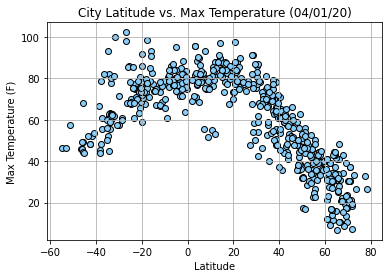

In [12]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black",facecolors="lightskyblue")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

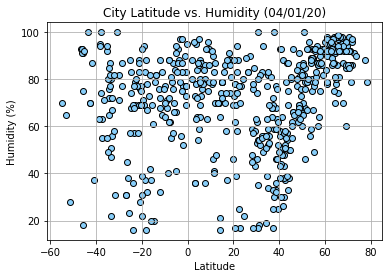

In [13]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="lightskyblue")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

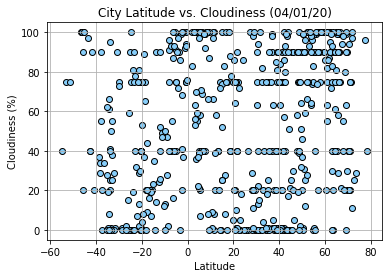

In [14]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black",facecolors="lightskyblue")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

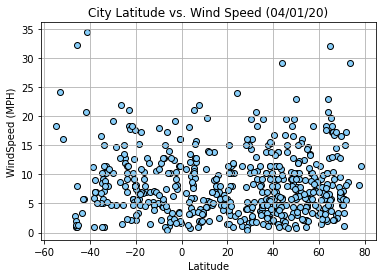

In [15]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black",facecolors="lightskyblue")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed (MPH)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Wind.png")
plt.show()

## Linear Regression

In [16]:
# I am creating all new data frames for each hemishperes, 
# since i couldn't figure out how to do it any other way,
# but this makes it easier for me, and produces same result
northern_df = pd.DataFrame(clean_city_data[clean_city_data.Lat >= 0])
# Save the new df as a csv
clean_city_data.to_csv("../Output_Data/Northern_DF")

northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,sal rei,16.18,-22.92,87.80,70,8,6.93,CV,1603044086
3,zaranj,30.97,61.88,68.00,18,0,16.11,AF,1603044086
4,ostrovnoy,68.05,39.51,34.38,87,55,13.22,RU,1603044086
5,tasiilaq,65.61,-37.64,33.80,74,29,17.22,GL,1603044086
7,qaanaaq,77.48,-69.36,32.85,88,96,8.19,GL,1603044087


In [17]:
southern_df = pd.DataFrame(clean_city_data[clean_city_data.Lat < 0])
# Save the new df as a csv
clean_city_data.to_csv("../Output_Data/Southern_DF")

southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaputa,-8.47,29.66,80.44,40,2,4.61,ZM,1603044085
1,busselton,-33.65,115.33,60.01,51,1,8.72,AU,1603044085
6,hualmay,-11.10,-77.61,68.54,65,49,10.60,PE,1603044087
8,avarua,-21.21,-159.78,73.40,83,81,5.82,CK,1603044087
10,esperance,-33.87,121.90,55.40,87,95,10.29,AU,1603044087


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8781574711970043


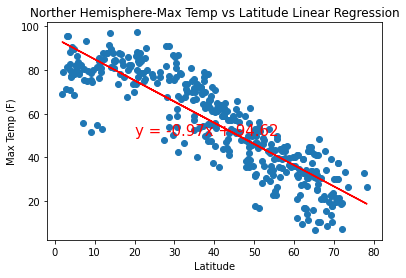

In [18]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Norther Hemisphere-Max Temp vs Latitude Linear Regression')
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/north_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6410867066772257


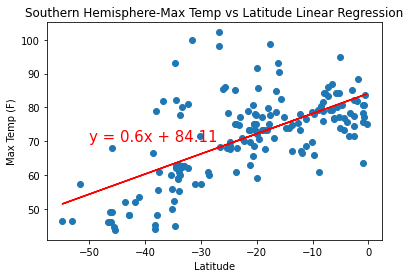

In [19]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere-Max Temp vs Latitude Linear Regression')
plt.annotate(line_eq,(-50,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/south_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3231625581187337


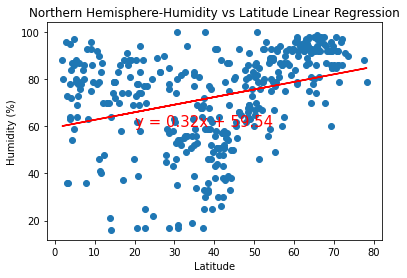

In [20]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere-Humidity vs Latitude Linear Regression')
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/north_humid.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0564326246065349


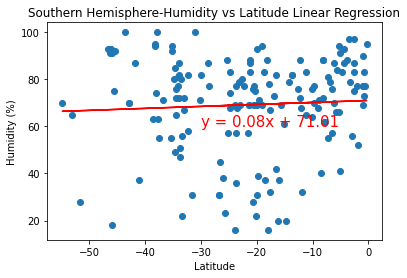

In [21]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere-Humidity vs Latitude Linear Regression')
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/south_humid.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17810406128156617


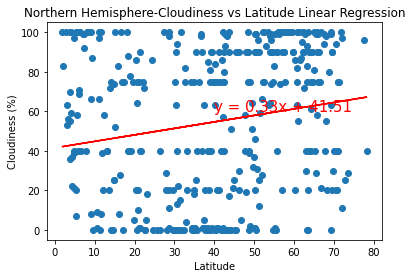

In [22]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere-Cloudiness vs Latitude Linear Regression')
plt.annotate(line_eq,(40,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/north_cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12630361208759391


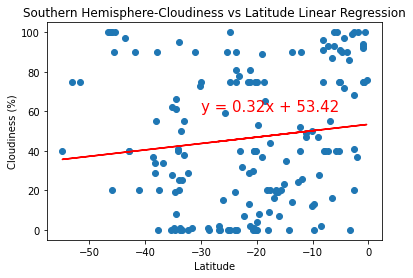

In [23]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere-Cloudiness vs Latitude Linear Regression')
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/south_cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08768483369981417


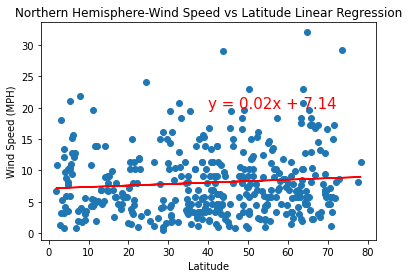

In [24]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere-Wind Speed vs Latitude Linear Regression')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/north_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.13613288423236525


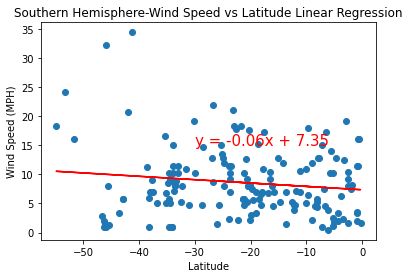

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere-Wind Speed vs Latitude Linear Regression')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("../Images/south_wind.png")